# Les SVM : première rencontre

## 1 - Cas linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Simuler un ensemble d’entraînement de dimension 2 linéairement séparable, c'est-à-dire que l'on peut séparer par une droite. Il devra être composé de 100 observations avec 2 caractéristiques chacune (*indication : on peut prendre par exemple y=1 pour x1 > 0.5*)
- Afficher cet ensemble en colorant par label.

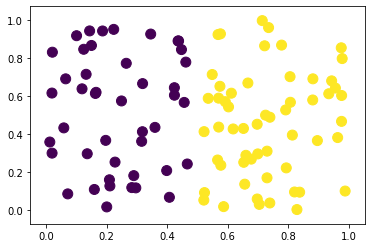

In [3]:
np.random.seed(0)
X = np.random.rand(100,2)
y = X[:,0] > 0.5
#y = X[:,1] > 0.6*X[:,0] + 0.2
plt.scatter(X[:,0],X[:,1], c = y, s = 100);

- Entrainer un classifieur SVM linéaire (LinearSVC) et calculer l'accuracy

In [4]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X,y)
print("accuracy:",svc.score(X,y))

accuracy: 0.99


- Faire varier le paramètre C pour voir son effet sur le modèle 

In [5]:
for C in [10**x for x in range(-5,5)]:
    svc = LinearSVC(C=C)
    svc.fit(X,y)
    print("accuracy:",svc.score(X,y))

accuracy: 0.56
accuracy: 0.56
accuracy: 0.56
accuracy: 0.74
accuracy: 0.96
accuracy: 0.99
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0


/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- Faire un graphique avec l'ensemble de décision en utilisant une fonction `frontiere` à définir (le graphique doit donc représenter les points et les 2 espaces séparés par la frontière de décision)

In [6]:
def frontiere(model, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # délimitation des axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # création d'une grille pour évaluer le modèle
    x = np.linspace(xlim[0], xlim[1], 1000)
    y = np.linspace(ylim[0], ylim[1], 1000)
    
    xx, yy = np.meshgrid(y, x)
    
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    d = model.decision_function(xy).reshape(xx.shape)
    z = model.predict(xy).reshape(xx.shape)
    
    # afficher la frontière et les marges
    ax.contour(xx, yy, d, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    ax.contourf(xx, yy, z, cmap = plt.cm.Paired, alpha=0.8)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

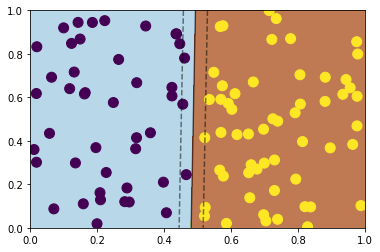

In [7]:
frontiere(svc)
plt.scatter(X[:,0],X[:,1], c = y, s = 100);


- Sur cet ensemble, ajouter du bruit aux y (par exemple avec une probabilité p, yi = 1-yi)
- Afficher l'ensemble, entrainer un SVM linéaire (LinearSVC) et faire varier le paramètre C.

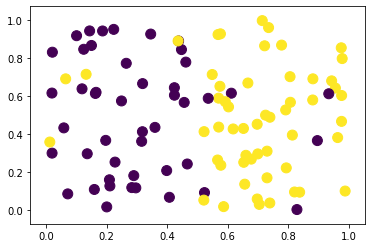

In [8]:
np.random.seed(0)
X = np.random.rand(100,2)
y = X[:,0] > 0.5

lignes_bruitees = np.random.choice(range(len(y)), 10)
y[lignes_bruitees] = 1 - y[lignes_bruitees]

plt.scatter(X[:,0],X[:,1], c = y, s = 100);

/home/elka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
/home/elka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
/home/elka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.
/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

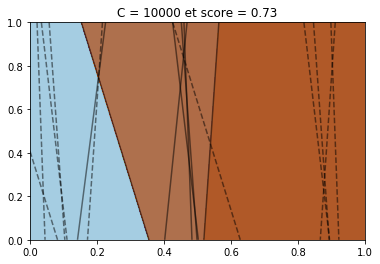

In [10]:
for C in [10**x for x in range(-5,5)]:
    svc = LinearSVC(C=C)
    svc.fit(X,y)
    frontiere(svc)
    plt.title('C = ' + str(C) + ' et score = ' + str(svc.score(X,y)))

# 2- Cas non linéaire : 

- Générer des données d'entrainement non linéairement séparable puis les afficher avec les couleurs. On peut utiliser : 
>- from sklearn.datasets import make_moons 
>- X, y = make_moons(noise = 0.1)

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(noise = 0.1, random_state=1)
plt.scatter(X[:,0],X[:,1], c = y, s = 100);

- Générer de la même manière un échantillon de données de test

In [ ]:
X_test, y_test = make_moons(noise = 0.1, random_state=321)
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, s = 100);

- Entraîner un SVM avec les différents noyaux possibles et avec différentes valeurs de $C$.

In [ ]:
from sklearn.svm import SVC 

In [ ]:
#kernel = 'linear'
for C in [10**x for x in range(-3,5)]:
    svc = SVC(C=C, kernel='linear')
    svc.fit(X,y)
    print("score entrainement:",svc.score(X,y), "et score test:", svc.score(X_test,y_test))
    frontiere(svc,X,y)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c = 'green', s = 200, marker='*')

In [ ]:
#kernel = 'poly'
for C in [10**x for x in range(-3,5)]:
    svc = SVC(C=C, kernel='poly', degree = 3, coef0 = 1)
    svc.fit(X,y)
    print("score entrainement:",svc.score(X,y), "et score test:", svc.score(X_test,y_test))
    frontiere(svc,X,y)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c = 'green', s = 200, marker='*')

In [ ]:
#kernel = 'rbf'
for C in [10**x for x in range(-3,5)]:
    svc = SVC(C=C, kernel='rbf')
    svc.fit(X,y)
    print("score d'entrainement:",svc.score(X,y), ". score de test:", svc.score(X_test,y_test))
    frontiere(svc,X,y)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c = 'green', s = 200, marker='*')

In [ ]:
#kernel = 'sigmoid'
for C in [10**x for x in range(-3,5)]:
    svc = SVC(C=C, kernel='sigmoid', coef0 = 1, gamma = 0.01)
    svc.fit(X,y)
    print("score d'entrainement:",svc.score(X,y), ". score de test:", svc.score(X_test,y_test))
    frontiere(svc,X,y)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c = 'green', s = 200, marker='*')

In [ ]:
X_train = X[n_samples / 2:]
y_train = y[n_samples / 2:]

X_valid = X[:n_samples / 2]
y_valid = y[:n_samples / 2]

print("X_train : {} exemples, avec 8*8 = {} features.".format(X_train.shape[0], X_train.shape[1]))

## 3. Une petite application sur les données de digits 

- Charger le jeu de données digits disponible dans sklearn
>- utiliser la fonction load_digits
>- regarder ce que contient le dataset
>- enregistrer les images dans une variables images
>- créer la matrice X à l'aide d'un reshape
>- créer le vecteur y à partir de l'attribut targets du dataset
- Afficher 8 images prises au hasard dans le jeu de données

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images
n_samples = len(digits.images)

X = images.reshape((n_samples, -1))
y = digits.target

plt.figure(figsize=(20,8))
idx_plt=1
for image in images[np.random.choice(range(n_samples),8)]:
    plt.subplot(2,4,idx_plt)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    idx_plt+=1

- Découper le dataset en échantillons d'entraînement et de test
- Entrainer un kNN, une régression logistique et un SVM
- Comparer ces modèles
- Utiliser GridSearchCV pour affiner le choix des hyperparamètres

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = {
    'knn': KNeighborsClassifier(3),
    'reglog': LogisticRegression(),
    'svc': SVC(gamma=0.001, C=1, kernel='rbf')
}

for k,v in models.items():
    model = v
    model.fit(X_train,y_train)
    print('score de',k,model.score(X_test,y_test))